In [1]:
import cianparser
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### EDA
**Moscow apartments rent**

Our goal is to estimate the average price per square meter, the average area of apartments in different districts of Moscow.
We are interested in the segment of middle-class apartments, for this we will have to clean the data from emissions and see which categories of apartments get there. It is necessary to deduce the popularity of districts by apartment segments and also to deduce the main characteristics for assessing the market for renting middle-class apartments in Moscow.

### Functions for subsequent data visualization

In [2]:
### constants
price = 'price_per_month'
price_for_m2 = 'price_for_m2'
meteres = 'total_meters'

In [3]:
def emiss(rooms, column):
    plt.figure(figsize=(4, 3))
    plt.boxplot(rooms[column], vert=False)
    plt.title('Выбросы')
    plt.xlabel(column)
    plt.show()

In [4]:
def filter_emiss(df, column):
    '''Removing outliers from the dataset'''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

### Reading datasets that we previously argued with Cyan

In [5]:
import pandas as pd
import glob
import os

In [6]:
for i in range(1,6):
    folder = f'C:/Users/Lenovo/Квартиры_циан/{i}_room'
    print(folder)
    files = glob.glob(os.path.join(folder, '*.csv'))

    dataset = pd.DataFrame()

    for file in files:
        df = pd.read_csv(file)
        dataset =  pd.concat([dataset,df], ignore_index=True)

    dataset.to_csv(f'{folder}_dataset.csv', index=False)

C:/Users/Lenovo/Квартиры_циан/1_room
C:/Users/Lenovo/Квартиры_циан/2_room
C:/Users/Lenovo/Квартиры_циан/3_room
C:/Users/Lenovo/Квартиры_циан/4_room
C:/Users/Lenovo/Квартиры_циан/5_room


In [7]:
room_1 = pd.read_csv('1_room_dataset.csv')
room_2 = pd.read_csv('2_room_dataset.csv')
room_3 = pd.read_csv('3_room_dataset.csv')
room_4 = pd.read_csv('4_room_dataset.csv')
room_5 = pd.read_csv('5_room_dataset.csv')

Example

In [8]:
room_1.head()

,author,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,year_of_construction,living_meters,kitchen_meters,phone,district,street,underground,residential_complex
0,ЦАН,https://www.cian.ru/rent/flat/292372927/,Москва,rent,flat,5,17,1,40.0,65000,40,2012,20.0,10.0,79670653863,Кунцево,Ярцевская,Молодёжная,NaN
1,ЦАН,https://www.cian.ru/rent/flat/292489776/,Москва,rent,flat,7,21,1,40.0,78000,50,-1,20.0,13.0,79670653863,Даниловский,проспект Лихачева,Технопарк,NaN
2,KOVCHEG,https://www.cian.ru/rent/flat/292490043/,Москва,rent,flat,7,20,1,40.0,78000,50,-1,25.0,13.0,79680606094,Даниловский,проспект Лихачева,Технопарк,NaN
3,ЦАН,https://www.cian.ru/rent/flat/292564195/,Москва,rent,flat,7,9,1,34.0,60000,50,1963,20.0,8.0,79851040128,Аэропорт,Академика Ильюшина,Аэропорт,NaN
4,KOVCHEG,https://www.cian.ru/rent/flat/292546927/,Москва,rent,flat,11,16,1,40.0,50000,60,1981,25.0,8.0,79153267319,Нагатинский затон,Судостроительная,Кленовый бульвар,NaN


### Description of the dataset

In [9]:
room_1.describe()

,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,year_of_construction,living_meters,kitchen_meters,phone
count,1219.000000,1219.000000,1219.0,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1.219000e+03
mean,7.853979,15.537326,1.0,38.254922,60002.540607,43.308450,1894.758819,16.583265,8.138638,7.947092e+10
std,6.634611,11.259189,0.0,9.564345,44645.247632,22.926706,428.388981,8.891902,4.453147,3.448421e+08
min,1.000000,1.000000,1.0,11.000000,20000.000000,0.000000,-1.000000,-1.000000,-1.000000,7.495476e+10
25%,3.000000,9.000000,1.0,33.650000,38500.000000,50.000000,1968.000000,16.000000,6.000000,7.916052e+10
50%,6.000000,14.000000,1.0,38.000000,45000.000000,50.000000,1989.000000,19.000000,8.000000,7.964588e+10
75%,10.000000,17.000000,1.0,40.250000,65000.000000,50.000000,2014.000000,20.000000,10.000000,7.966064e+10
max,50.000000,95.000000,1.0,115.000000,400000.000000,99.000000,2023.000000,95.000000,30.000000,7.989203e+10


In [10]:
room_2.describe()

,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,year_of_construction,living_meters,kitchen_meters,phone
count,807.000000,807.000000,807.000000,807.000000,8.070000e+02,807.000000,807.000000,807.000000,807.000000,8.070000e+02
mean,9.529120,17.914498,1.997522,59.494721,1.072207e+05,37.040892,1883.299876,25.703841,7.942999,7.945241e+10
std,10.950207,17.620239,0.049752,22.798469,1.186898e+05,25.394448,448.104607,18.159215,5.698524,4.856043e+08
min,1.000000,2.000000,1.000000,30.000000,3.000000e+04,0.000000,-1.000000,-1.000000,-1.000000,7.495476e+10
25%,3.000000,9.000000,2.000000,46.000000,4.500000e+04,0.000000,1965.000000,4.000000,6.000000,7.916101e+10
50%,6.000000,13.000000,2.000000,55.000000,5.600000e+04,50.000000,1985.000000,30.000000,8.000000,7.964782e+10
75%,11.000000,18.000000,2.000000,65.000000,1.200000e+05,50.000000,2014.500000,35.000000,10.000000,7.966063e+10
max,75.000000,95.000000,2.000000,476.000000,1.300000e+06,99.000000,2023.000000,120.000000,40.000000,7.989152e+10


In [11]:
room_3.describe()

,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,year_of_construction,living_meters,kitchen_meters,phone,residential_complex
count,1173.000000,1173.000000,1173.0,1173.000000,1.173000e+03,1173.000000,1173.000000,1173.000000,1173.000000,1.173000e+03,0.0
mean,9.689685,18.505541,3.0,99.785592,1.851280e+05,21.624041,1922.915601,42.545610,10.453538,7.948126e+10,NaN
std,10.113479,16.157692,0.0,34.274871,1.706674e+05,24.641304,358.197836,33.365194,7.971511,4.334952e+08,NaN
min,1.000000,3.000000,3.0,40.300000,4.200000e+04,0.000000,-1.000000,-1.000000,-1.000000,7.495476e+10,NaN
25%,4.000000,8.000000,3.0,75.000000,8.200000e+04,0.000000,1968.000000,-1.000000,7.000000,7.916433e+10,NaN
50%,7.000000,14.000000,3.0,90.000000,1.300000e+05,0.000000,2001.000000,48.000000,10.000000,7.965108e+10,NaN
75%,12.000000,22.000000,3.0,120.000000,2.200000e+05,50.000000,2010.000000,62.000000,15.000000,7.967065e+10,NaN
max,75.000000,97.000000,3.0,265.000000,1.836042e+06,90.000000,2023.000000,240.000000,80.000000,7.985978e+10,NaN


In [12]:
room_4.describe()

,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,year_of_construction,living_meters,kitchen_meters,phone,residential_complex
count,1724.000000,1724.000000,1724.000000,1724.000000,1.724000e+03,1724.000000,1724.000000,1724.000000,1724.000000,1.724000e+03,0.0
mean,8.014501,14.986079,3.995360,165.426676,3.518723e+05,2.966937,1880.392691,67.842807,14.233179,7.947168e+10,NaN
std,8.109546,14.193213,0.076041,42.677347,2.156291e+05,11.490921,427.998272,54.073446,11.430942,4.984273e+08,NaN
min,1.000000,2.000000,3.000000,62.000000,5.000000e+04,0.000000,-1.000000,-1.000000,-1.000000,7.495476e+10,NaN
25%,3.000000,6.000000,4.000000,140.000000,2.300000e+05,0.000000,1917.000000,-1.000000,8.000000,7.916454e+10,NaN
50%,5.000000,9.000000,4.000000,165.000000,3.300000e+05,0.000000,2000.000000,83.000000,15.000000,7.964783e+10,NaN
75%,10.000000,18.000000,4.000000,185.000000,4.000000e+05,0.000000,2006.000000,105.000000,20.000000,7.967130e+10,NaN
max,82.000000,97.000000,5.000000,360.000000,2.000000e+06,75.000000,2022.000000,250.000000,100.000000,7.985979e+10,NaN


In [13]:
room_5.describe()

,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,year_of_construction,living_meters,kitchen_meters,phone,residential_complex
count,1185.000000,1185.000000,1185.0,1185.000000,1.185000e+03,1185.000000,1185.000000,1185.000000,1185.000000,1.185000e+03,0.0
mean,7.629536,13.234599,5.0,220.549283,5.448308e+05,1.535865,1876.695359,90.443038,16.591561,7.943189e+10,NaN
std,7.774284,13.135880,0.0,72.065756,4.670434e+05,8.220192,424.503668,79.968482,13.314869,5.515694e+08,NaN
min,1.000000,2.000000,5.0,89.000000,6.197600e+04,0.000000,-1.000000,-1.000000,-1.000000,7.495476e+10,NaN
25%,3.000000,6.000000,5.0,170.000000,3.100000e+05,0.000000,1915.000000,-1.000000,10.000000,7.916276e+10,NaN
50%,4.000000,8.000000,5.0,201.000000,4.500000e+05,0.000000,2000.000000,109.000000,15.000000,7.964631e+10,NaN
75%,8.000000,15.000000,5.0,252.000000,6.000000e+05,0.000000,2006.000000,132.000000,22.000000,7.966063e+10,NaN
max,71.000000,95.000000,5.0,530.000000,3.382182e+06,50.000000,2021.000000,424.000000,65.000000,7.985965e+10,NaN


### We sort the year of construction and get rid of incorrect data

In [14]:
room_1 = room_1[(room_1['year_of_construction']!=-1) & (room_1['year_of_construction'] < 2015) & (room_1['rooms_count']== 1)]

In [15]:
room_2 = room_2[(room_2['year_of_construction']!=-1) & (room_2['year_of_construction'] < 2015) & (room_2['rooms_count']== 2)]

In [16]:
room_3 = room_3[(room_3['year_of_construction']!=-1) & (room_3['year_of_construction'] < 2015) & (room_3['rooms_count']== 3)]

In [17]:
room_4 = room_4[(room_4['year_of_construction']!=-1) & (room_4['year_of_construction'] < 2015) & (room_4['rooms_count']== 4)]

In [18]:
room_5 = room_5[(room_5['year_of_construction']!=-1) & (room_5['year_of_construction'] < 2015) & (room_5['rooms_count']== 5)]

### During parsing, ads could accidentally hit several times, we will remove duplicates.

In [19]:
room_1.drop_duplicates(inplace=True)

In [20]:
room_2.drop_duplicates(inplace=True)

In [21]:
room_3.drop_duplicates(inplace=True)

In [22]:
room_4.drop_duplicates(inplace=True)

In [23]:
room_5.drop_duplicates(inplace=True)

### Adding the price per sq. m attribute

In [24]:
room_1['price_for_m2'] = room_1['price_per_month']/room_1['total_meters']

In [25]:
room_2['price_for_m2'] = room_2['price_per_month']/room_2['total_meters']

In [26]:
room_3['price_for_m2'] = room_3['price_per_month']/room_3['total_meters']

In [27]:
room_4['price_for_m2'] = room_4['price_per_month']/room_4['total_meters']

In [28]:
room_5['price_for_m2'] = room_5['price_per_month']/room_5['total_meters']

### Visualization

In [29]:
def emiss(rooms, column):
    '''Builds a boxplot of the transmitted dataset attribute'''
    plt.figure(figsize=(4, 3))
    plt.boxplot(rooms[column], vert=False)
    plt.title('Boxplot')
    plt.xlabel(column)
    plt.show()

In [61]:
def hist_features(df, column):
    '''Outputs the distribution of the transmitted attribute'''
    plt.figure(figsize=(5, 4))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution histogram {column}')
    plt.ylabel(f'Number of rooms: {df.rooms_count.max()}')

    mean_price = df[column].mean()
    median_price = df[column].median()

    plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f} ')
    plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Meadian: {median_price:.2f} ')
    plt.legend()

    plt.show()

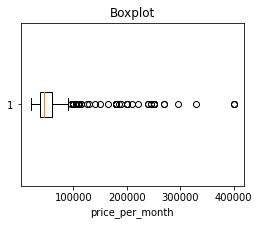

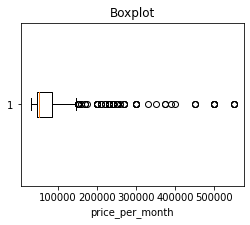

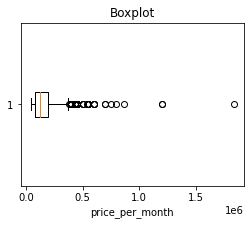

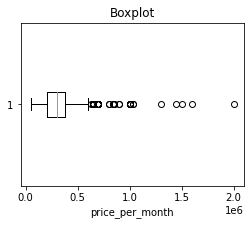

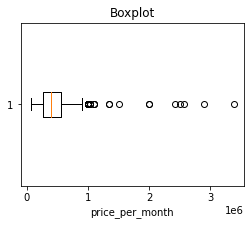

In [31]:
emiss(room_1, price)
emiss(room_2, price)
emiss(room_3, price)
emiss(room_4, price)
emiss(room_5, price)

In [32]:
room_1 = filter_emiss(room_1, price_for_m2)
room_1 = filter_emiss(room_1, meteres)
room_1 = filter_emiss(room_1, price)

In [33]:
room_2 = filter_emiss(room_2, price_for_m2)
room_2 = filter_emiss(room_2, meteres)
room_2 = filter_emiss(room_2, price)

In [34]:
room_3 = filter_emiss(room_3, price_for_m2)
room_3 = filter_emiss(room_3, meteres)
room_3 = filter_emiss(room_3, price)

In [35]:
room_4 = filter_emiss(room_4, price_for_m2)
room_4 = filter_emiss(room_4, meteres)
room_4 = filter_emiss(room_4, price)

In [36]:
room_5 = filter_emiss(room_5, price_for_m2)
room_5 = filter_emiss(room_5, meteres)
room_5 = filter_emiss(room_5, price)

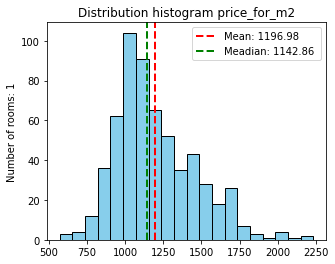

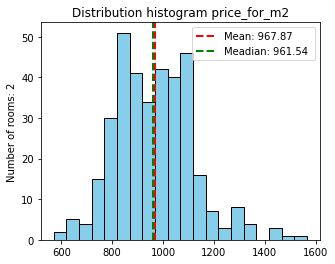

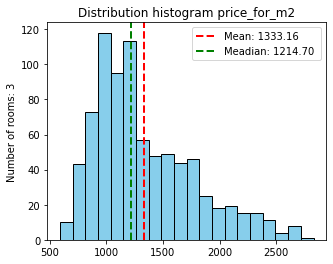

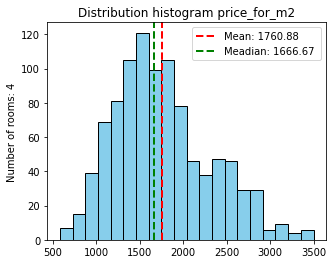

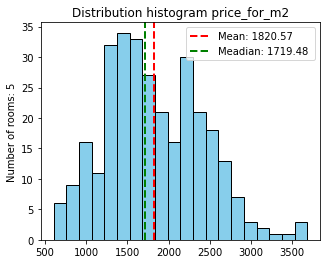

In [62]:
hist_features(room_1, price_for_m2)
hist_features(room_2, price_for_m2)
hist_features(room_3, price_for_m2)
hist_features(room_4, price_for_m2)
hist_features(room_5, price_for_m2)

In [38]:
dfg_room_1 = room_1.groupby(['district']).agg({'price_for_m2': 'median',
                                  'price_per_month': 'median',
                                  'total_meters' : 'mean',
                                  'author': 'count'})

In [39]:
dfg_room_2 = room_2.groupby(['district']).agg({'price_for_m2': 'median',
                                  'price_per_month': 'median',
                                  'total_meters' : 'mean',
                                  'author': 'count'})

In [40]:
dfg_room_3 = room_3.groupby(['district']).agg({'price_for_m2': 'median',
                                  'price_per_month': 'median',
                                  'total_meters' : 'mean',
                                  'author': 'count'})

In [41]:
dfg_room_4 = room_4.groupby(['district']).agg({'price_for_m2': 'median',
                                  'price_per_month': 'median',
                                  'total_meters' : 'mean',
                                  'author': 'count'})

In [42]:
dfg_room_5 = room_5.groupby(['district']).agg({'price_for_m2': 'median',
                                  'price_per_month': 'median',
                                  'total_meters' : 'mean',
                                  'author': 'count'})

In [43]:
room_1_final = dfg_room_1[dfg_room_1['author']>1]

In [44]:
room_2_final = dfg_room_2[dfg_room_2['author']>1]

In [45]:
room_3_final = dfg_room_3[dfg_room_3['author']>1]

In [46]:
room_4_final = dfg_room_4[dfg_room_4['author']>1]

In [47]:
room_5_final = dfg_room_5[dfg_room_5['author']>1]

In [48]:
room_1_final.reset_index(inplace=True)
room_2_final.reset_index(inplace=True)
room_3_final.reset_index(inplace=True)
room_4_final.reset_index(inplace=True)
room_5_final.reset_index(inplace=True)

In [49]:
def popular_district(df, top):
    df_sorted = df.sort_values(by='author', ascending=False)
    
    top_districts = df_sorted.head(top)
    
    other_districts = df_sorted.iloc[top:]
    
    other_row = pd.DataFrame({
        'district': ['Другие'],
        'author': [other_districts['author'].sum()]
    })

    combined_data = pd.concat([top_districts, other_row])

    sizes = combined_data['author']

    labels = combined_data['district']

    colors = plt.cm.viridis(np.arange(len(sizes))/len(sizes))

    plt.figure(figsize=(10, 8))
    plt.pie(sizes, 
            labels=labels,
            colors=colors,
            startangle=100,
            textprops={'color': 'white', 'fontsize': 10})

    legend_labels = [f'{label} ({size} / {size/sum(sizes)*100:.1f}%)' for label, size in zip(labels, sizes)]
    plt.title(f'Distribution of the number of apartments by districts of Moscow (Top {top})')

    plt.legend(legend_labels, loc='upper right')

    plt.axis('equal')

    plt.show()

In [50]:
def barplot_attributes(df, column, top):
    
    df_sorted = df.sort_values(by=column, ascending=True)
    
    top_districts = df_sorted.head(top)
    plt.figure(figsize=(7, 7))
    plt.bar(top_districts['district'],
            top_districts[column],
            color='darkmagenta')
    plt.xticks(rotation=90)

    plt.xlabel('Districts')
    plt.ylabel(column)

    plt.title('')

    plt.show()

### Top 1-room apartments of low cost per square meter

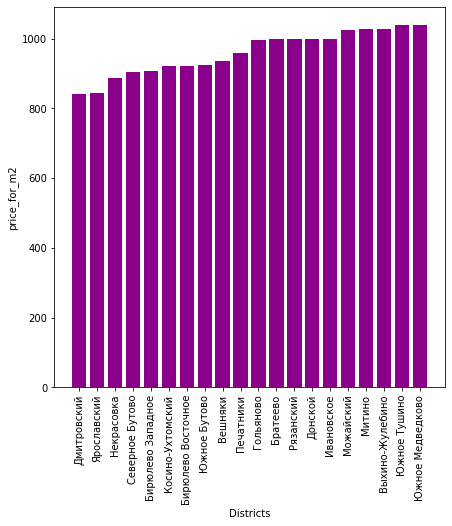

In [51]:
barplot_attributes(room_1_final,price_for_m2, 20)

### Top 2-room apartments of low cost per square meter

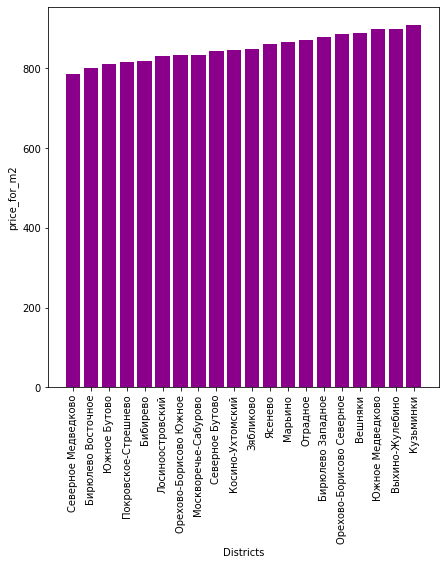

In [52]:
barplot_attributes(room_2_final,price_for_m2, 20)

### Top 3-room apartments of low cost per square meter

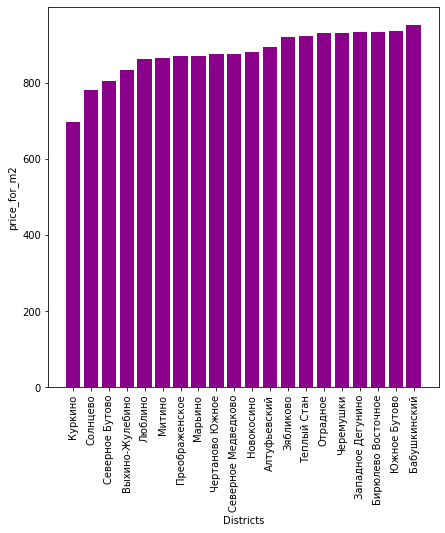

In [53]:
barplot_attributes(room_3_final,price_for_m2, 20)

### Top 4-room apartments of low cost per square meter

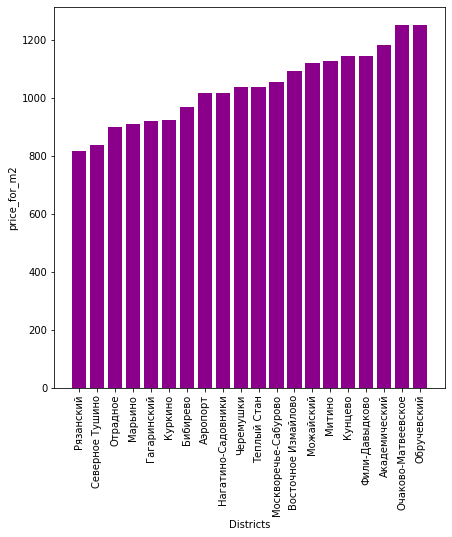

In [54]:
barplot_attributes(room_4_final,price_for_m2, 20)

### Top 5-room apartments of low cost per square meter

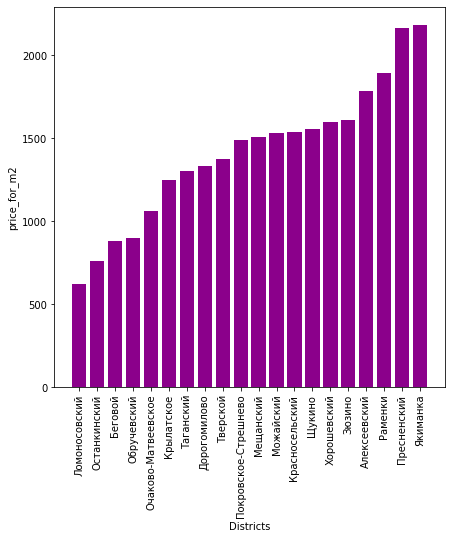

In [55]:
barplot_attributes(room_5_final,price_for_m2, 20)

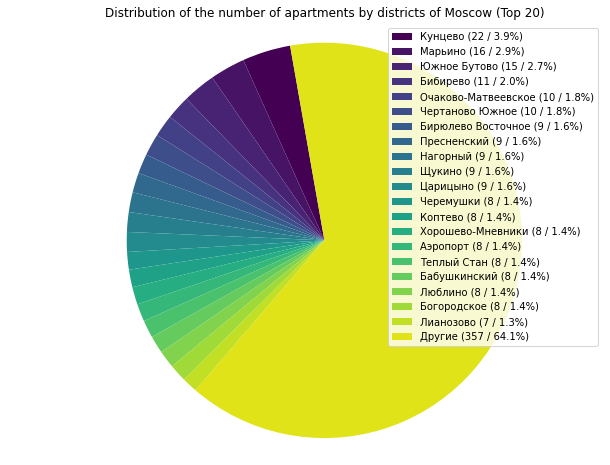

In [56]:
popular_district(room_1_final, 20)

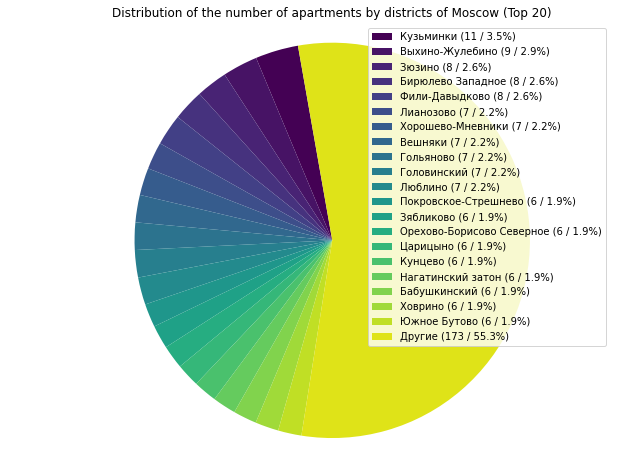

In [57]:
popular_district(room_2_final, 20)

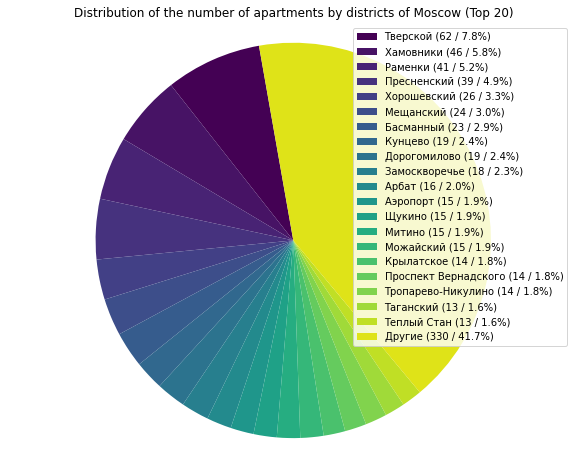

In [58]:
popular_district(room_3_final, 20)

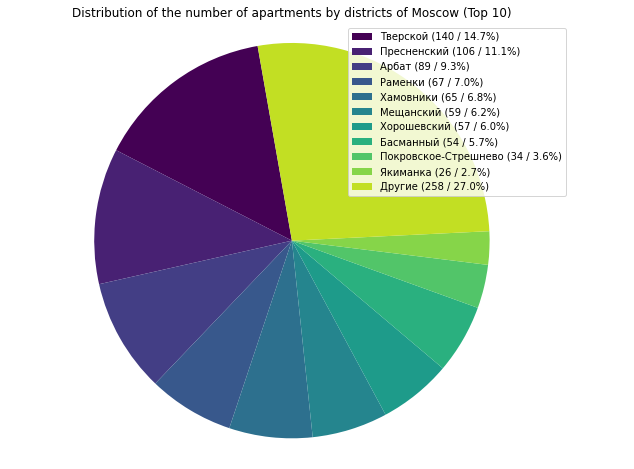

In [59]:
popular_district(room_4_final, 10)

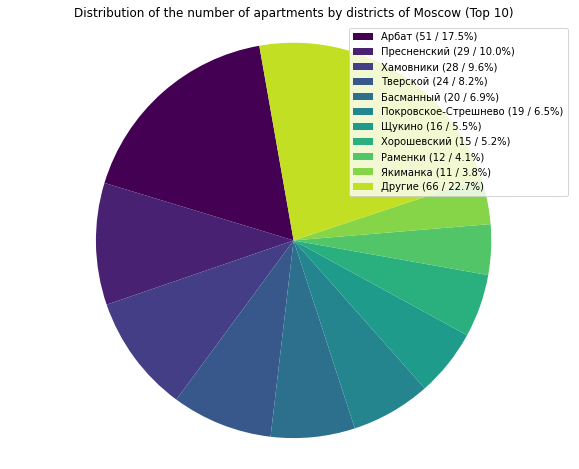

In [60]:
popular_district(room_5_final, 10)

### Saving to Excel

In [63]:
room_1_final.to_excel('1_Room_final.xlsx', index=True, engine='openpyxl')

In [64]:
room_2_final.to_excel('2_Room_final.xlsx', index=True, engine='openpyxl')

In [65]:
room_3_final.to_excel('3_Room_final.xlsx', index=True, engine='openpyxl')

In [66]:
room_4_final.to_excel('4_Room_final.xlsx', index=True, engine='openpyxl')

In [67]:
room_5_final.to_excel('5_Room_final.xlsx', index=True, engine='openpyxl')